In [69]:
import numpy as np
import collections, numpy
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv('data.csv', sep=',')

# Spotify Dataset 1921-2020, 160k+ Tracks
https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [58]:
#Checking out pandas dataframe
df.head(6)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
5,0.995,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.1200,0,6NxAf7M8DNHOBTmEd3JSO5,0.911,6,0.0915,-19.242,0,Scherzo a capriccio: Presto,0,1928,0.0593,63.521,0.2660,1928


In [59]:
#Attributes of pandas dataframe, 169909 songs, 19 variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [60]:
#Descriptive statistics
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [61]:
#Checking missing values
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

## Barplot of most frequent artists

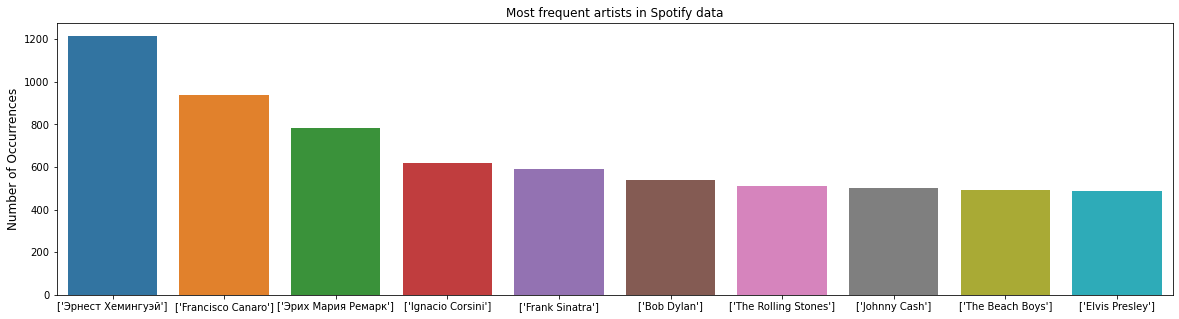

In [62]:
#artists_count=df.groupby(['artists']).count().sort_values('id', ascending=False)['id']
artists_count=df['artists'].value_counts()
artists_count=artists_count[:10, ]

plt.figure(figsize=(20,5))
sns.barplot(x = artists_count.index, y = artists_count.values)
plt.title('Most frequent artists in Spotify data')
plt.ylabel('Artists', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

## Heatmap

<AxesSubplot:>

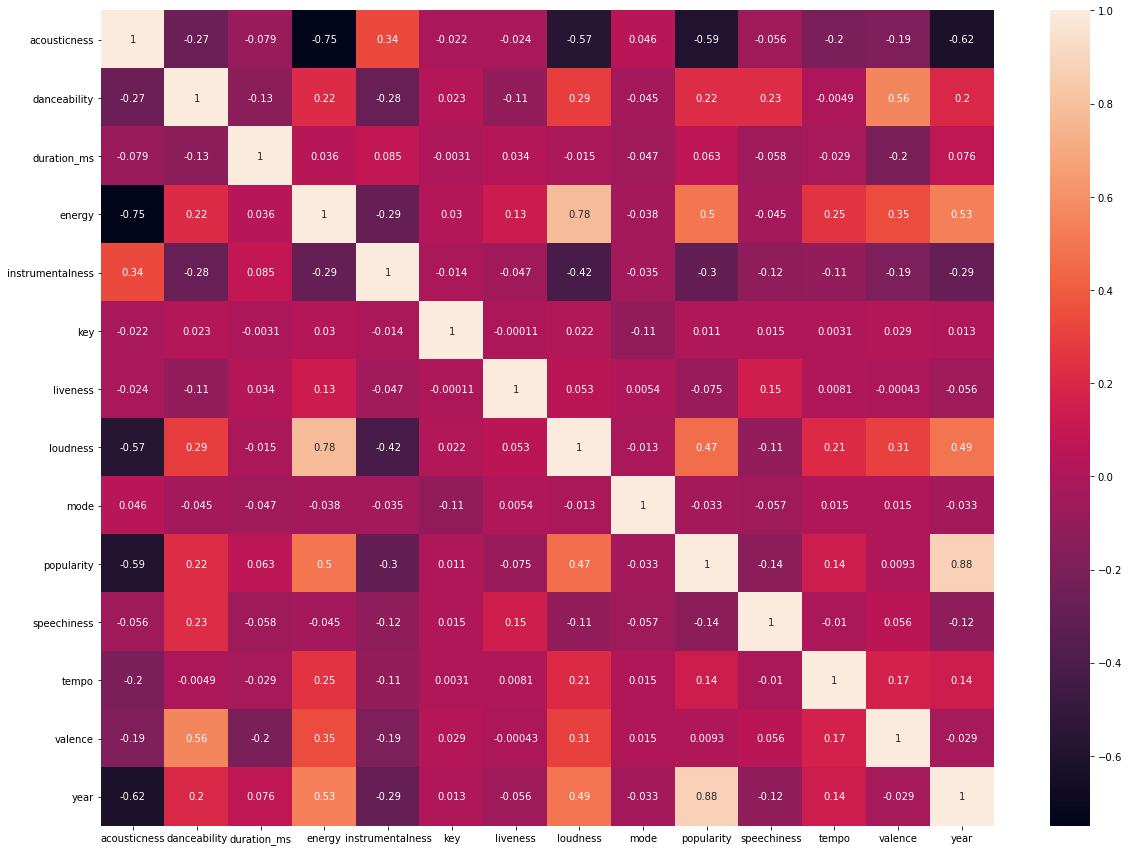

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(df[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
               'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 
                'tempo', 'valence', 'year']].corr(method='pearson'),annot=True)

## Distribution of variables

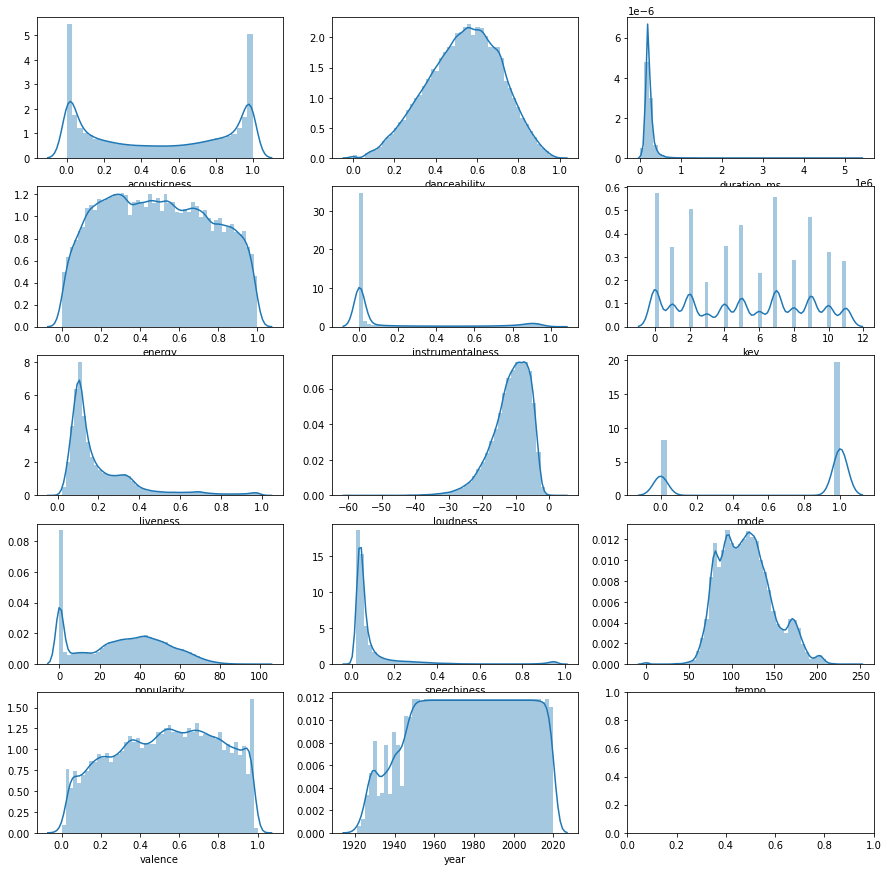

In [91]:
vars = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
               'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 
                'tempo', 'valence', 'year']

fig, ax =plt.subplots(5,3, figsize=(15,15))
k=0;j=0;i=0
while i<=4:
    while j<=2:
        if (k == len(vars)):
            break
        sns.distplot(df[vars[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1; 

## Boxplots

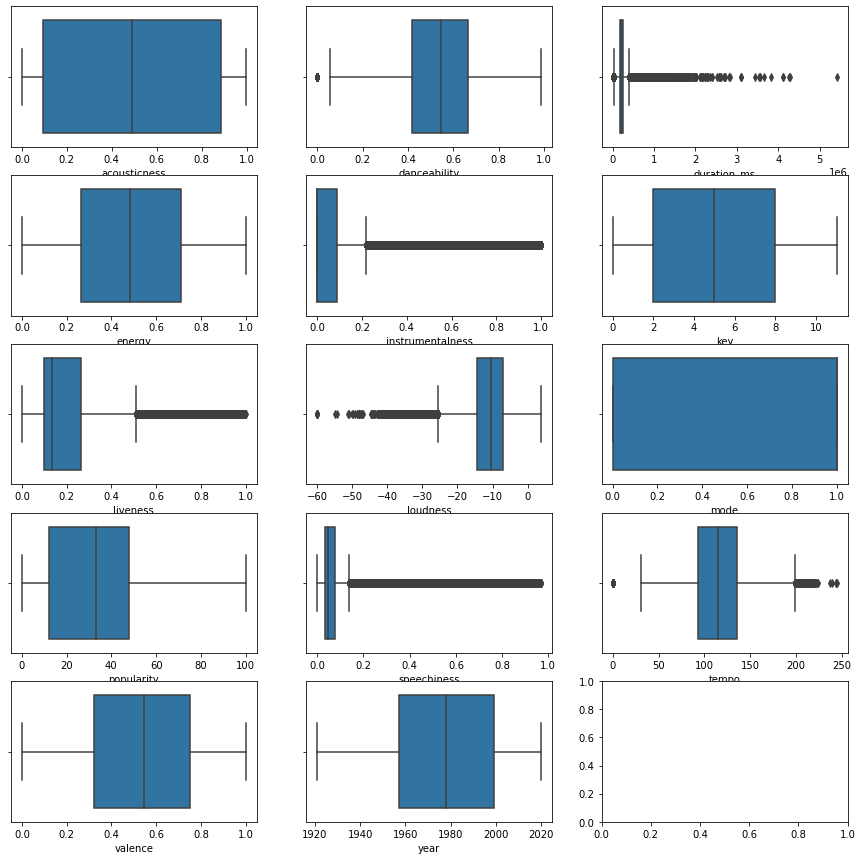

In [90]:
fig, ax =plt.subplots(5,3, figsize=(15,15))
k=0;j=0;i=0
while i<=4:
    while j<=2:
        if (k == len(vars)):
            break
        sns.boxplot(df[vars[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1; 

# Unsupervised learning 
## K-means clustering

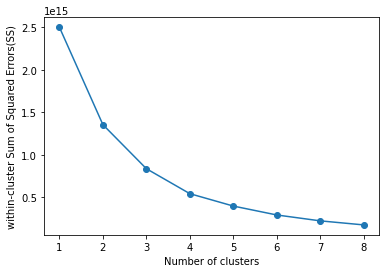

In [47]:
vars = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
               'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 
                'tempo', 'valence', 'year']

SSE=[]
for i in range(1, 9):
    kmeans_modell = KMeans(
    init='k-means++',
    n_clusters=i,
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
    
    kmeans_modell.fit(df[vars]) 

    SSE.append(kmeans_modell.inertia_)
    
# plot
plt.plot(range(1, 9), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster Sum of Squared Errors(SS)')
plt.show()

[9.99999857e-01 7.86454553e-08]
[5.00087731e+07 1.40243599e+04]


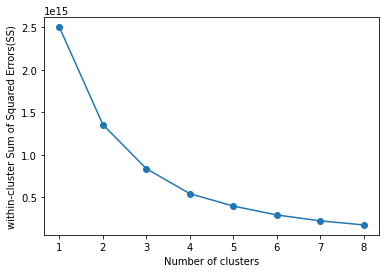

In [80]:
#with two PCA
reduced_data = PCA(n_components=2).fit_transform(df[vars])
print("Explained variance ratio")
print(pca.explained_variance_ratio_)
print("PCA singulat values")
print(pca.singular_values_)

SSE=[]
for i in range(1, 9):
    pca_kmeans = KMeans(init='k-means++', 
                        n_clusters=i, n_init=10, max_iter=300, 
                        tol=1e-04, random_state=0)

    
    pca_kmeans.fit(reduced_data)
    SSE.append(pca_kmeans.inertia_)

plt.plot(range(1, 9), SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster Sum of Squared Errors(SS)')
plt.show()




In [102]:
#number of observations in each cluster with different cluster numbers
for i in range(1,5):
    
    pca_kmeans = KMeans(init='k-means++', 
                        n_clusters=i, n_init=10, max_iter=300, 
                        tol=1e-04, random_state=0)

    reduced_data_km = pca_kmeans.fit_predict(reduced_data)
    print(collections.Counter(reduced_data_km))



Counter({0: 169909})
Counter({0: 157221, 1: 12688})
Counter({1: 127545, 0: 40424, 2: 1940})
Counter({0: 99068, 3: 61157, 1: 9089, 2: 595})


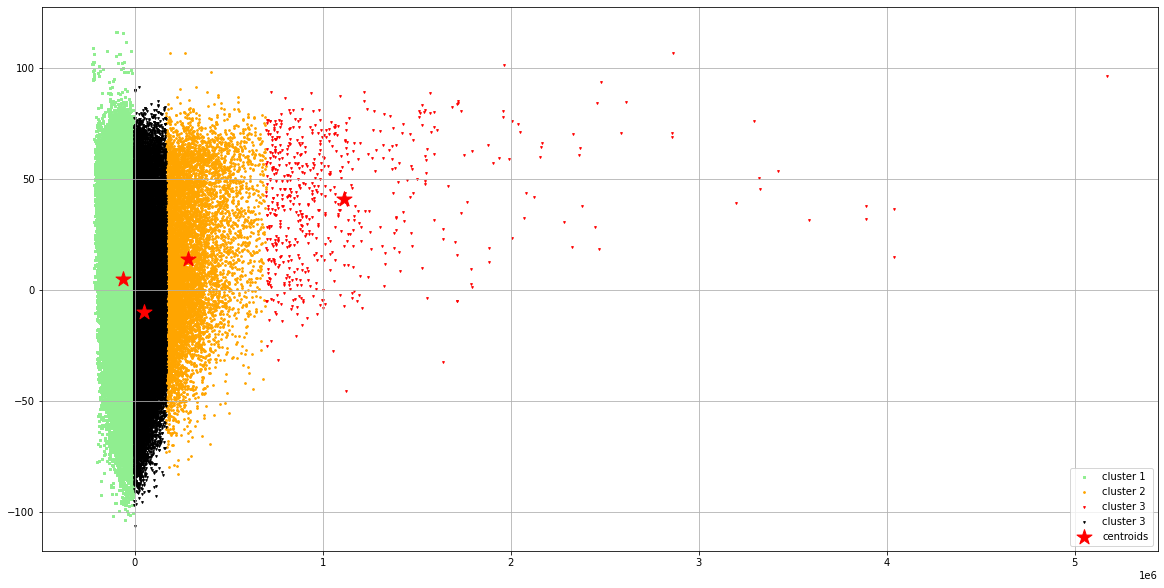

In [110]:
plt.figure(figsize=(20,10))
plt.scatter(
    reduced_data[reduced_data_km == 0, 0], reduced_data[reduced_data_km == 0, 1],
    s=3, c='lightgreen',
    marker='s',
    label='cluster 1'
)

plt.scatter(
    reduced_data[reduced_data_km == 1, 0], reduced_data[reduced_data_km == 1, 1],
    s=3, c='orange',
    marker='o',
    label='cluster 2'
)

plt.scatter(
    reduced_data[reduced_data_km == 2, 0], reduced_data[reduced_data_km == 2, 1],
    s=3, c='red',
    marker='v',
    label='cluster 3'
)

plt.scatter(
    reduced_data[reduced_data_km == 3, 0], reduced_data[reduced_data_km == 3, 1],
    s=3, c='black',
    marker='v',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()